In [1]:
#%run spatial_analysis_load_and_calc.ipynb
%run spatial_analysis_load.ipynb

working dir: /opt/dssg-hot/notebooks/shirley
Test commercial vs. private classification; following # should be zero: 0
Test commerical vs. private classification by num of trips; following # should be zero: 0
Test one-time use frequency classification; following # should be zero: 0


In [49]:
# Group trips

In [146]:
fips_entryhr_nb_grouped = dfnow[dfnow['entry_plaza']<13].groupby(['fips','entry_hr'])
entryhr_nb_grouped = dfnow[dfnow['entry_plaza']<13].groupby('entry_hr')
fips_entryhr_sb_grouped = dfnow[dfnow['entry_plaza']>=13].groupby(['fips','entry_hr'])
entryhr_sb_grouped = dfnow[dfnow['entry_plaza']>=13].groupby('entry_hr')

In [5]:
fips_entryhr_grouped = dfnow.groupby(['fips','entry_hr'])
entryhr_grouped = dfnow.groupby('entry_hr')

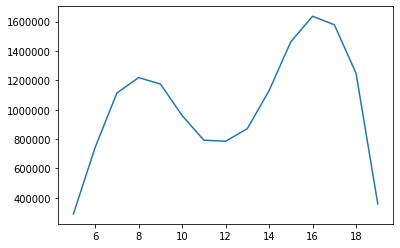

In [8]:
plt.plot(entryhr_grouped['trip_id'].nunique())

In [32]:
fips_entryhr_perc_trips_from_bg = (fips_entryhr_grouped.agg({'trip_id': 'nunique'})
       ).div(entryhr_grouped.agg({'trip_id': 'nunique'}), 
             level='entry_hr')* 100

# Plot relationships

In [ ]:
plt.plot(cbgs_join['avg_dist'],cbgs_join['avg_toll_wohov'],'.')

In [ ]:
plt.plot(cbgs_join['med_inc'],cbgs_join['avg_toll_wohov'],'.')

In [ ]:
plt.plot(cbgs_join['med_inc'],cbgs_join['avg_dist'],'.')

In [ ]:
# - Scatterplot matrix, but didn't really look like anything at all
# cols = cbgs_join_df.columns.drop(['fips','population','race_nonhisp_asian','trans_carpool','trans_drivealone','trans_transit','num_trips','num_users','num_trips_hov','num_trips_sov'])
# dfpp = cbgs_join_df[cols]
# sns.set(style='ticks')
# sns.pairplot(dfpp)

# Plot maps

In [ ]:
def plot_on_bgs(colnamenow, titlenow, pngnamenow):
    fig,ax = plt.subplots(figsize = (20,15))
    #ax.set_ylim([47.25, 48])
    #ax.set_xlim([-122.5, -122])
    ax.set_ylim([47.2, 48.25])
    ax.set_xlim([-122.45, -121.8])
    ax.set_title(titlenow)

    cbgs_join.plot(column = colnamenow, ax = ax, legend = True)

    majrds.plot(ax=ax, color='gray', linewidth=3)
    #for x, y, label in zip(majrds.geometry.x, majrds.geometry.y, majrds.StateRoute):
    #    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

    majcps.plot(ax=ax, color='white')
    for x, y, label in zip(majcps.geometry.x, majcps.geometry.y, majcps.NAME):
        ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords='offset points', color='white')

    majtpsnb.plot(ax=ax, color='magenta', markersize=100)

    fig.savefig('/opt/dssg-hot/notebooks/shirley/pngs/' + pngnamenow + '.png', bbox_inches='tight', pad_inches = 0)

#### Number of trips

In [ ]:
colnamenow = 'num_trips'; titlenow = 'Number of trips'; pngnamenow = 'fips_num_trips'
plot_on_bgs(colnamenow, titlenow, pngnamenow)

#### Number of users

In [ ]:
colnamenow = 'num_users'; titlenow = 'Number of unique users'; pngnamenow = 'fips_num_users'
plot_on_bgs(colnamenow, titlenow, pngnamenow)

#### Number of HOV trips

In [ ]:
colnamenow = 'num_trips_hov'; titlenow = 'Number of HOV trips'; pngnamenow = 'fips_num_trips_hov'
plot_on_bgs(colnamenow, titlenow, pngnamenow)

#### Frac of HOV trips

In [ ]:
colnamenow = 'frac_trips_hov'; titlenow = 'HOV trips/all trips within each BG'; pngnamenow = 'fips_frac_trips_hov_within_bg'
plot_on_bgs(colnamenow, titlenow, pngnamenow)

#### Frac of SOV trips

In [ ]:
colnamenow = 'frac_trips_sov'; titlenow = 'SOV trips/all trips within each BG'; pngnamenow = 'fips_frac_trips_sov_within_bg'
plot_on_bgs(colnamenow, titlenow, pngnamenow)

#### Avg toll of all trips

In [ ]:
colnamenow = 'avg_toll_whov'; titlenow = 'Avg toll of all trips (including HOV=$0) within each BG'; pngnamenow = 'fips_avg_toll_whov'
plot_on_bgs(colnamenow, titlenow, pngnamenow)

In [ ]:
colnamenow = 'avg_toll_wohov'; titlenow = 'Avg toll of all trips (excluding HOV=$0) within each BG'; pngnamenow = 'fips_avg_toll_wohov'
plot_on_bgs(colnamenow, titlenow, pngnamenow)

#### Avg dist of all trips

In [ ]:
colnamenow = 'avg_dist'; titlenow = 'Avg dist of all HOT trips within each BG'; pngnamenow = 'fips_avg_dist'
plot_on_bgs(colnamenow, titlenow, pngnamenow)

#### Time of day

In [ ]:
colnamenow = 'num_trips_m_peak'; titlenow = '# of HOT trips btwn 5-10am'; pngnamenow = 'fips_num_trips_m_peak'
plot_on_bgs(colnamenow, titlenow, pngnamenow)

In [ ]:
colnamenow = 'num_trips_e_peak'; titlenow = '# of HOT trips btwn 3-8pm'; pngnamenow = 'fips_num_trips_e_peak'
plot_on_bgs(colnamenow, titlenow, pngnamenow)

In [ ]:
colnamenow = 'num_trips_m_peak_sb'; titlenow = '# of SB HOT trips btwn 5-10am'; pngnamenow = 'fips_num_trips_m_peak_sb'
plot_on_bgs(colnamenow, titlenow, pngnamenow)

In [ ]:
colnamenow = 'num_trips_e_peak_sb'; titlenow = '# of SB HOT trips btwn 3-8pm'; pngnamenow = 'fips_num_trips_e_peak_sb'
plot_on_bgs(colnamenow, titlenow, pngnamenow)

In [ ]:
colnamenow = 'num_trips_m_peak_nb'; titlenow = '# of NB HOT trips btwn 5-10am'; pngnamenow = 'fips_num_trips_m_peak_nb'
plot_on_bgs(colnamenow, titlenow, pngnamenow)

In [ ]:
colnamenow = 'num_trips_e_peak_nb'; titlenow = '# of NB HOT trips btwn 3-8pm'; pngnamenow = 'fips_num_trips_e_peak_nb'
plot_on_bgs(colnamenow, titlenow, pngnamenow)

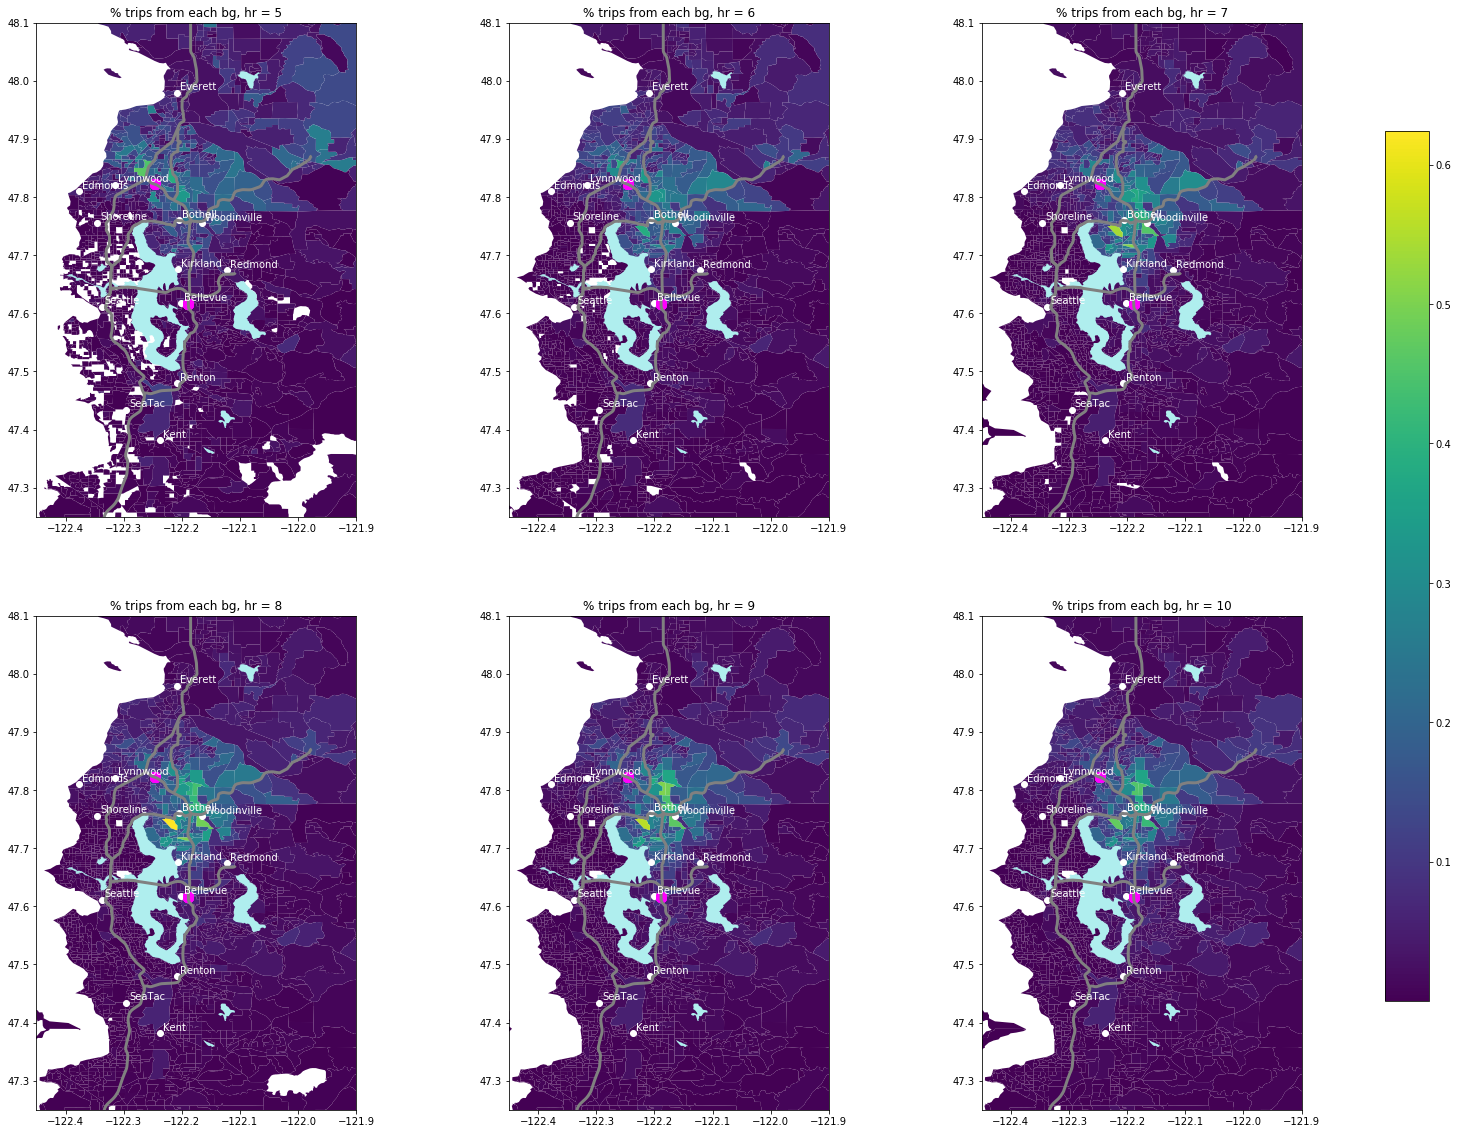

In [132]:
pngnamenow = 'morning_hrs_perc_trips_from_each_bg'

fig,axes = plt.subplots(2, 3, figsize = (30,20))

vmin = fips_entryhr_perc_trips_from_bg.min()
vmax = fips_entryhr_perc_trips_from_bg.max()

ihr = 5
for yax in range(0,2):
    for xax in range(0,3):
        axes[yax][xax].set_ylim([47.25, 48.1])
        axes[yax][xax].set_xlim([-122.45, -121.9])
        axes[yax][xax].set_title('% trips from each bg, hr = ' + str(ihr))

        cbgs.merge(fips_entryhr_perc_trips_from_bg.xs(ihr, level='entry_hr'), on='fips'
                  ).plot(column = 'trip_id', ax = axes[yax][xax], vmin = vmin, vmax = vmax)

        majlks.plot(ax=axes[yax][xax], color='paleturquoise', linewidth=3)
        majrds.plot(ax=axes[yax][xax], color='gray', linewidth=3)
        majcps.plot(ax=axes[yax][xax], color='white')
        for x, y, label in zip(majcps.geometry.x, majcps.geometry.y, majcps.NAME):
            axes[yax][xax].annotate(label, xy=(x, y), xytext=(3, 3), textcoords='offset points', color='white')
            majtpsnb.plot(ax=axes[yax][xax], color='magenta', markersize=100)

        ihr = ihr+1

cb = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax))
fig.colorbar(cb, ax=axes.ravel().tolist(), shrink=0.8)

fig.savefig('/opt/dssg-hot/notebooks/shirley/pngs/' + pngnamenow + '.png', bbox_inches='tight', pad_inches = 0)

# https://stackoverflow.com/questions/36008648/colorbar-on-geopandas
# https://jdhao.github.io/2017/06/11/mpl_multiplot_one_colorbar/

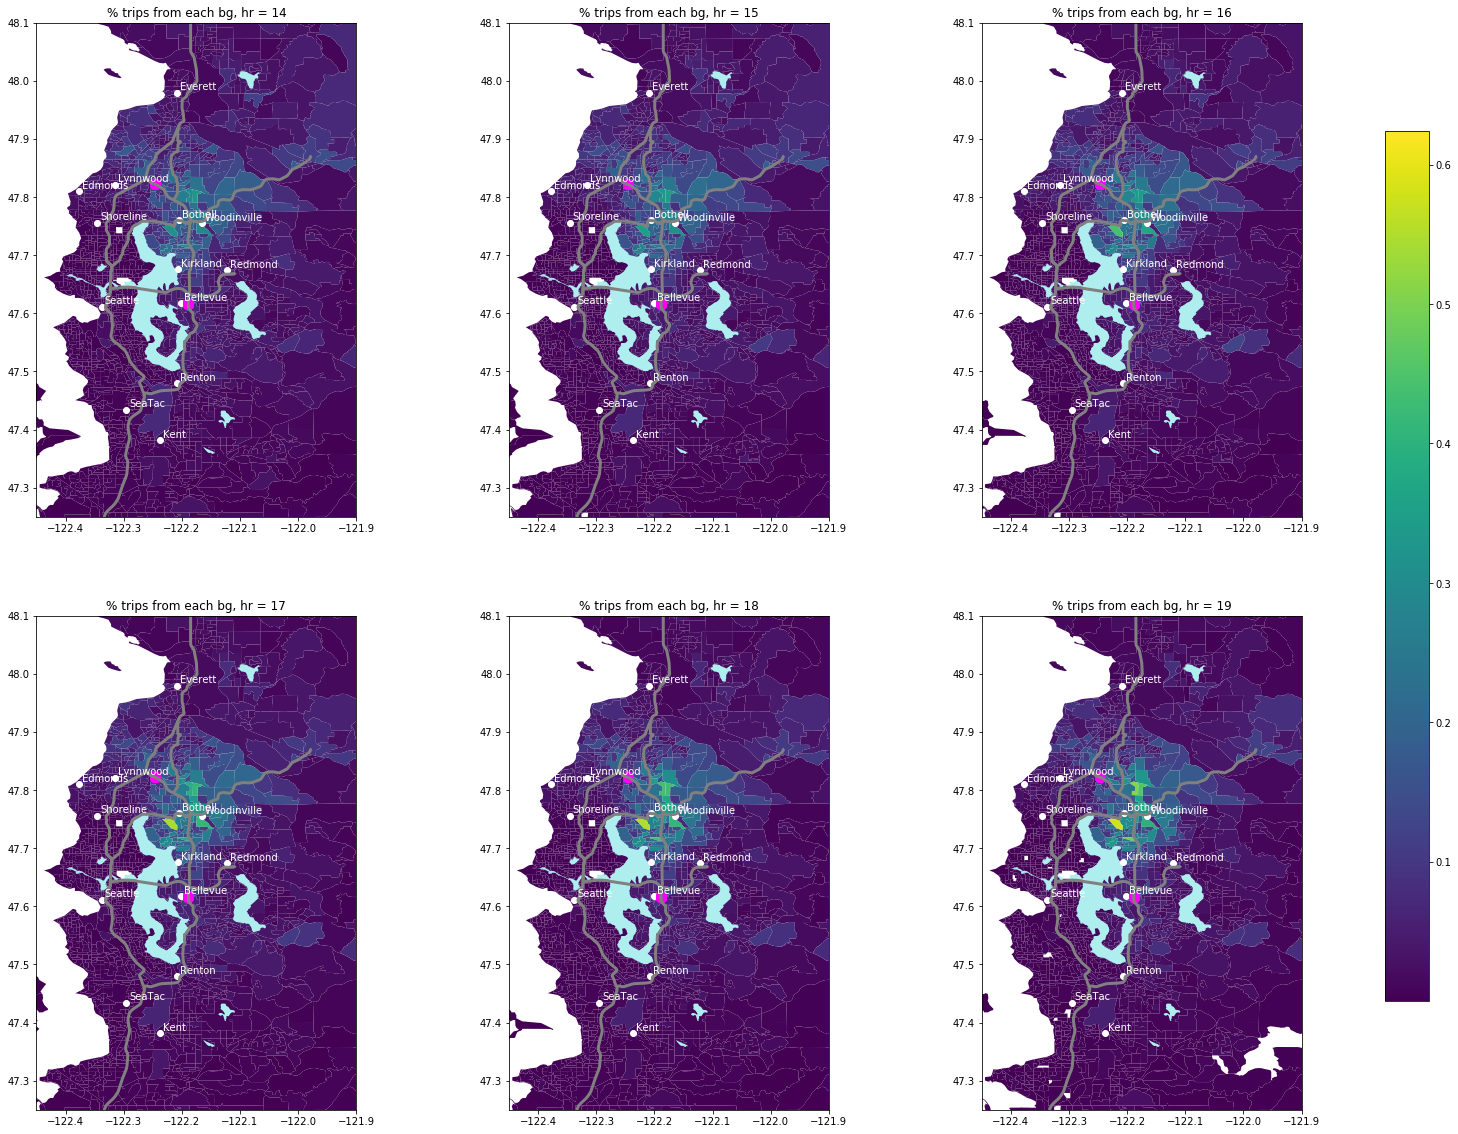

In [134]:
pngnamenow = 'evening_hrs_perc_trips_from_each_bg'

fig,axes = plt.subplots(2, 3, figsize = (30,20))

vmin = fips_entryhr_perc_trips_from_bg.min()
vmax = fips_entryhr_perc_trips_from_bg.max()

ihr = 14
for yax in range(0,2):
    for xax in range(0,3):
        axes[yax][xax].set_ylim([47.25, 48.1])
        axes[yax][xax].set_xlim([-122.45, -121.9])
        axes[yax][xax].set_title('% trips from each bg, hr = ' + str(ihr))

        cbgs.merge(fips_entryhr_perc_trips_from_bg.xs(ihr, level='entry_hr'), on='fips'
                  ).plot(column = 'trip_id', ax = axes[yax][xax], vmin = vmin, vmax = vmax)

        majlks.plot(ax=axes[yax][xax], color='paleturquoise', linewidth=3)
        majrds.plot(ax=axes[yax][xax], color='gray', linewidth=3)
        majcps.plot(ax=axes[yax][xax], color='white')
        for x, y, label in zip(majcps.geometry.x, majcps.geometry.y, majcps.NAME):
            axes[yax][xax].annotate(label, xy=(x, y), xytext=(3, 3), textcoords='offset points', color='white')
            majtpsnb.plot(ax=axes[yax][xax], color='magenta', markersize=100)

        ihr = ihr+1

cb = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax))
fig.colorbar(cb, ax=axes.ravel().tolist(), shrink=0.8)

fig.savefig('/opt/dssg-hot/notebooks/shirley/pngs/' + pngnamenow + '.png', bbox_inches='tight', pad_inches = 0)

In [ ]:
pngnamenow = 'morning_hrs_perc_trips_from_each_bg'

fig,axes = plt.subplots(2, 3, figsize = (30,20))

vmin = fips_entryhr_perc_trips.min()
vmax = fips_entryhr_perc_trips.max()

ihr = 5
for yax in range(0,2):
    for xax in range(0,3):
        axes[yax][xax].set_ylim([47.25, 48.1])
        axes[yax][xax].set_xlim([-122.45, -121.9])
        axes[yax][xax].set_title('% trips from each bg, hr = ' + str(ihr))

        cbgs.merge(fips_entryhr_perc_trips.xs(ihr, level='entry_hr'), on='fips'
                  ).plot(column = 'trip_id', ax = axes[yax][xax], vmin = vmin, vmax = vmax)

        majlks.plot(ax=axes[yax][xax], color='paleturquoise', linewidth=3)
        majrds.plot(ax=axes[yax][xax], color='gray', linewidth=3)
        majcps.plot(ax=axes[yax][xax], color='white')
        for x, y, label in zip(majcps.geometry.x, majcps.geometry.y, majcps.NAME):
            axes[yax][xax].annotate(label, xy=(x, y), xytext=(3, 3), textcoords='offset points', color='white')
            majtpsnb.plot(ax=axes[yax][xax], color='magenta', markersize=100)

        ihr = ihr+1

cb = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax))
fig.colorbar(cb, ax=axes.ravel().tolist(), shrink=0.8)

fig.savefig('/opt/dssg-hot/notebooks/shirley/pngs/' + pngnamenow + '.png', bbox_inc